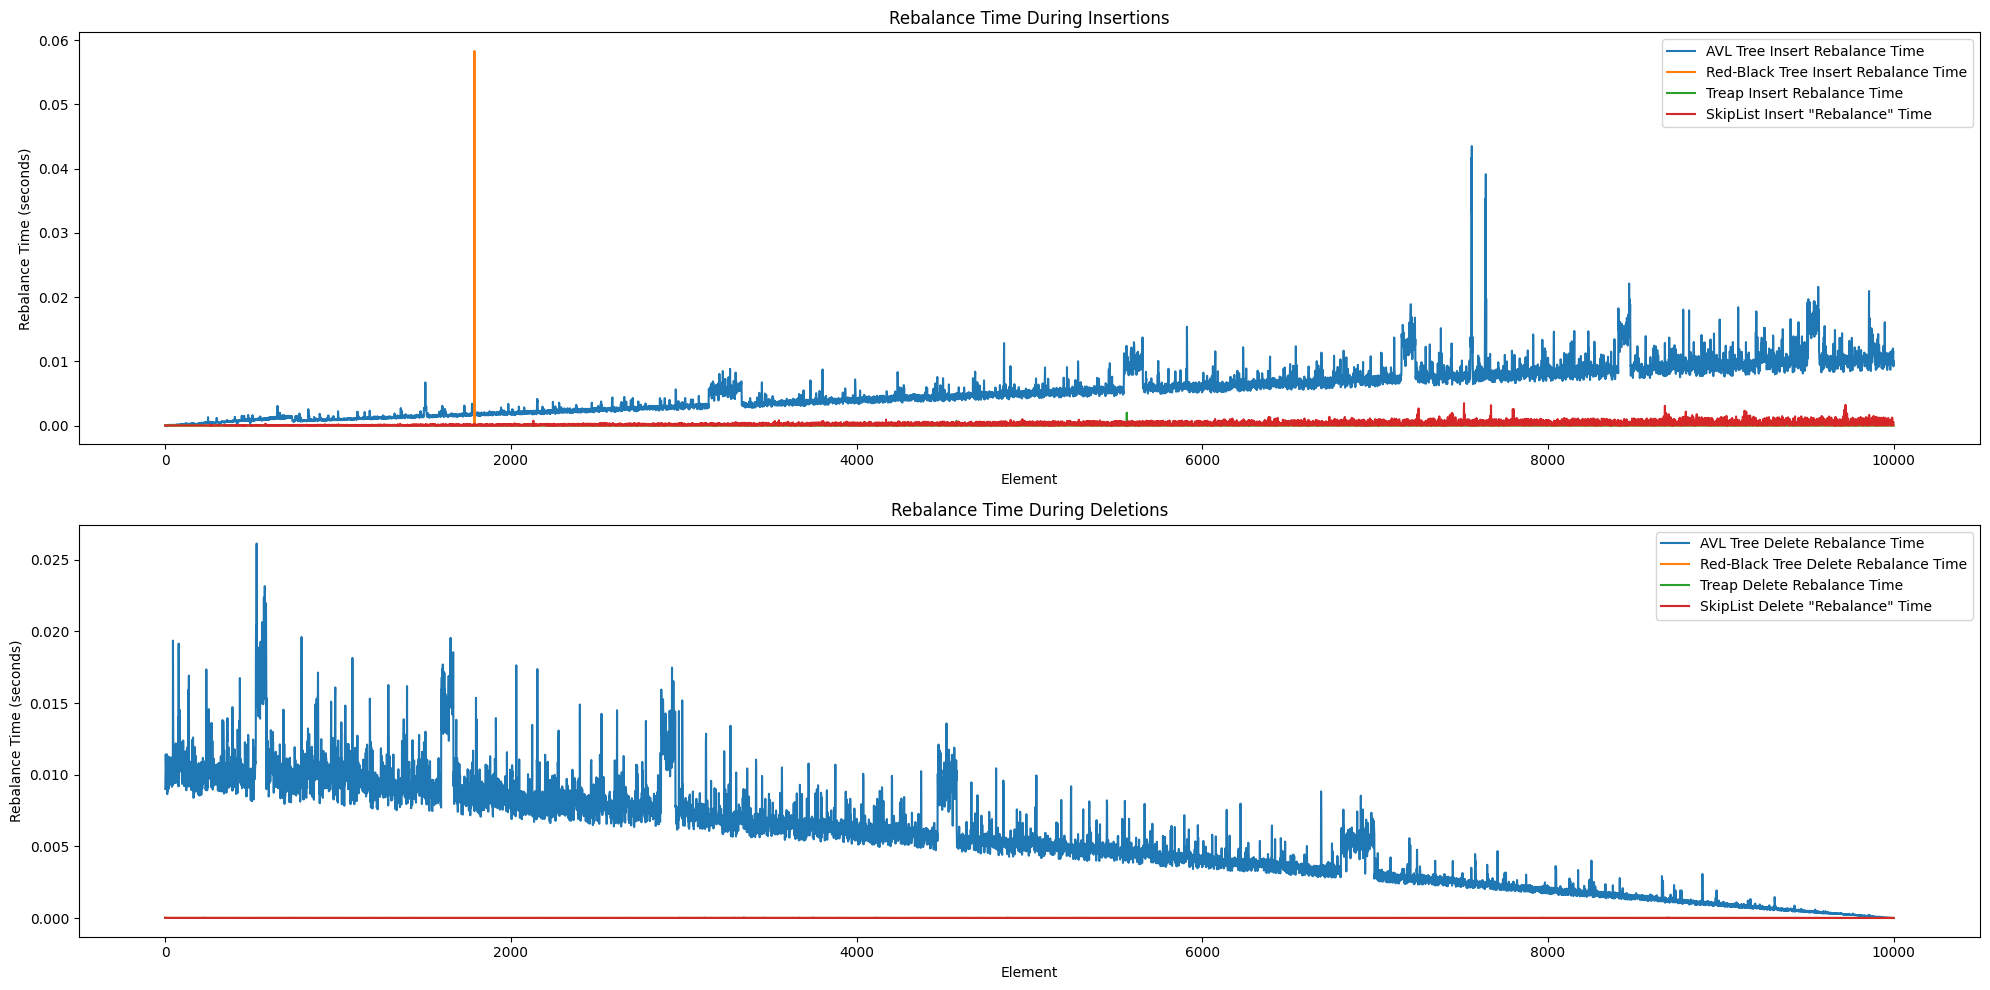

In [4]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys

class TreapNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.priority = random.random()
        self.left = None
        self.right = None

    def __repr__(self):
        return f"TreapNode(key={self.key}, priority={self.priority:.3f})"

class Treap:
    def __init__(self):
        self.root = None

    def _rotate_left(self, node):
        right = node.right
        node.right = right.left
        right.left = node
        return right

    def _rotate_right(self, node):
        left = node.left
        node.left = left.right
        left.right = node
        return left

    def _insert(self, node, key, value):
        if not node:
            return TreapNode(key, value)

        if key < node.key:
            node.left = self._insert(node.left, key, value)
            if node.left.priority < node.priority:
                node = self._rotate_right(node)
        elif key > node.key:
            node.right = self._insert(node.right, key, value)
            if node.right.priority < node.priority:
                node = self._rotate_left(node)

        return node

    def insert(self, key, value=None):
        self.root = self._insert(self.root, key, value)


    def _delete(self, node, key):
        if not node:
            return None

        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if not node.left or not node.right:
                node = node.left or node.right
            else:
                if node.left.priority < node.right.priority:
                    node = self._rotate_right(node)
                    node.right = self._delete(node.right, key)
                else:
                    node = self._rotate_left(node)
                    node.left = self._delete(node.left, key)

        return node

    def delete(self, key):
        self.root = self._delete(self.root, key)

    def _get_height(self, node):
        if not node:
            return 0
        return 1 + max(self._get_height(node.left), self._get_height(node.right))

    def get_height(self):
        return self._get_height(self.root)

    def _search(self, node, key):
        if node is None:
            return None
        if key == node.key:
            return node
        elif key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

    def search(self, key):
        node = self._search(self.root, key)
        # Ensure the node itself is returned, not just the value.
        return node if node else None


    def pre_order(self):
        return self._pre_order_traversal(self.root)

    def _pre_order_traversal(self, node, result=None):
        if result is None:
            result = []
        if node:
            result.append((node.key, node.value))
            self._pre_order_traversal(node.left, result)
            self._pre_order_traversal(node.right, result)
        return result



    def post_order(self):
        return self._post_order_traversal(self.root)

    def _post_order_traversal(self, node, result=None):
        if result is None:
            result = []
        if node:
            self._post_order_traversal(node.left, result)
            self._post_order_traversal(node.right, result)
            result.append((node.key, node.value))
        return result

    def print_tree(self, node, indent="", last=True):
        if node is not None:
            print(indent, " -> " if last else " -> ", node, sep="")
            indent += "    " if last else "    "
            self.print_tree(node.left, indent, False)
            self.print_tree(node.right, indent, True)

    def in_order(self):
      return self._in_order_traversal(self.root)

    def verify_balance(self):
        height = self.get_height()
        return True

    def insert_with_rebalance_timing(self, key, value=None):
        start_time = time.time()
        self.insert(key, value)  # existing insert method that includes heapifying
        rebalance_time = time.time() - start_time
        return rebalance_time, True

    def delete_with_rebalance_timing(self, key):
        start_time = time.time()
        result = self.delete(key)  # existing delete method that includes heapifying
        rebalance_time = time.time() - start_time
        return rebalance_time, result

    def measure_memory_usage(self, operation, key):
        start_memory = get_size(self)
        if operation == 'insert':
            self.insert(key)
        elif operation == 'delete':
            self.delete(key)
        elif operation == 'search':
            self.search(key)
        end_memory = get_size(self)
        return end_memory - start_memory

    def _in_order_traversal(self, node, result=None):
        if result is None:
            result = []
        if node:
            self._in_order_traversal(node.left, result)
            result.append((node.key, node.value))
            self._in_order_traversal(node.right, result)
        return result

    def check_treap_properties(self, node):
        if node is None:
            return True

        # Check binary search tree property
        if (node.left and node.left.key > node.key) or (node.right and node.right.key < node.key):
            return False

        # Check heap property
        if (node.left and node.left.priority > node.priority) or (node.right and node.right.priority > node.priority):
            return False

        # Recursively check properties for left and right subtrees
        return self.check_treap_properties(node.left) and self.check_treap_properties(node.right)

class SkipListNode:
    def __init__(self, key, height):
        self.key = key
        self.next = [None] * height


class SkipList:
    def __init__(self):
        self.max_height = 32
        self.head = SkipListNode(float("-inf"), self.max_height)

    def random_height(self):
        height = 1
        while random.random() < 0.5 and height < self.max_height:
            height += 1
        return height

    def insert_with_rebalance_timing(self, key, value=None):
        start_time = time.time()
        self.insert(key, value)  # existing insert method
        update_time = time.time() - start_time
        return update_time, True

    def delete_with_rebalance_timing(self, key):
        start_time = time.time()
        result = self.delete(key)  # existing delete method
        update_time = time.time() - start_time
        return update_time, result

    def insert(self, key, value=None):  # Added value parameter
        height = self.random_height()
        new_node = SkipListNode(key, height)
        update = [None] * height
        current = self.head

        for i in range(height - 1, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]
            update[i] = current

        for i in range(height):
            new_node.next[i] = update[i].next[i]
            update[i].next[i] = new_node

    def search(self, key):
        current = self.head

        for i in range(self.max_height - 1, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]

        current = current.next[0]

        if current and current.key == key:
            return current

        return None

    def delete(self, key):
        update = [None] * self.max_height
        current = self.head

        for i in range(self.max_height - 1, -1, -1):
            while current.next[i] and current.next[i].key < key:
                current = current.next[i]
            update[i] = current

        current = current.next[0]

        if current and current.key == key:
            for i in range(self.max_height):
                if update[i].next[i] != current:
                    break
                update[i].next[i] = current.next[i]

    def print_elements(self):
        current = self.head.next[0]
        while current:
            print(current.key, end=" ")
            current = current.next[0]
        print()

    def pre_order(self):
        return self.pre_order_traversal()

    def pre_order_traversal(self):
        result = []
        current = self.head.next[0]  # Start from the first actual element, not the head
        while current:
            result.append(current.key)
            current = current.next[0]  # Move to the next node at the lowest level
        return result

    def post_order(self):
        return self.post_order_traversal()

    def post_order_traversal(self):
        stack = [self.head]
        result = []
        while stack:
            node = stack.pop()
            if node:
                result.append(node.key)
                for next_node in node.next:
                    stack.append(next_node)
        return result

    def skip_list_pre_order_time(self):
        start_time = time.time()
        self.pre_order_traversal()
        end_time = time.time()
        return end_time - start_time

    def skip_list_post_order_time(self):
        start_time = time.time()
        self.post_order_traversal()
        end_time = time.time()
        return end_time - start_time

    def get_height(self):
        current = self.head
        max_height = 0
        while current:
            level_height = sum(1 for next_node in current.next if next_node is not None)
            max_height = max(max_height, level_height)
            current = current.next[0]
        return max_height

    def print_structure(self):
        current_levels = len(self.head.next)
        for level in range(current_levels - 1, -1, -1):
            current = self.head.next[level]
            print("Level", level, end=": ")
            while current:
                print(current.key, end=" -> ")
                current = current.next[level]
            print("None")


class AVLNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.height = 1
        self.left = None
        self.right = None

class AVLTree:
    def __init__(self):
        self.root = None

    def get_height(self):
        return self._get_height(self.root)

    def _get_height(self, node):
        if not node:
            return 0
        return 1 + max(self._get_height(node.left), self._get_height(node.right))

    def _get_balance(self, node):
        if node is None:
            return 0
        return self._get_height(node.left) - self._get_height(node.right)

    def _rotate_right(self, y):
        if not y or not y.left:
            return y
        x = y.left
        y.left = x.right
        x.right = y
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))
        x.height = 1 + max(self._get_height(x.left), self._get_height(x.right))
        return x

    def _rotate_left(self, x):
        if not x or not x.right:
            return x
        y = x.right
        x.right = y.left
        y.left = x
        x.height = 1 + max(self._get_height(x.left), self._get_height(x.right))
        y.height = 1 + max(self._get_height(y.left), self._get_height(y.right))
        return y

    def insert(self, key, value= None):
        self.root = self._insert(self.root, key, value)

    def _insert(self, node, key, value):
        if node is None:
            return AVLNode(key, value)
        if key < node.key:
            node.left = self._insert(node.left, key, value)
        else:
            node.right = self._insert(node.right, key, value)

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))
        balance = self._get_balance(node)

        if balance > 1 and key < node.left.key:
            return self._rotate_right(node)
        elif balance < -1 and key > node.right.key:
            return self._rotate_left(node)
        elif balance > 1 and key > node.left.key:
            node.left = self._rotate_left(node.left)
            return self._rotate_right(node)
        elif balance < -1 and key < node.right.key:
            node.right = self._rotate_right(node.right)
            return self._rotate_left(node)

        return node

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search(node.left, key)
        return self._search(node.right, key)

    def delete(self, key):
        self.root = self._delete(self.root, key)

    def _delete(self, node, key):
        if not node:
            return node

        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if not node.left:
                return node.right
            elif not node.right:
                return node.left
            else:
                temp = self._min_value_node(node.right)
                node.key = temp.key
                node.value = temp.value  # Update value if needed
                node.right = self._delete(node.right, temp.key)

        node.height = 1 + max(self._get_height(node.left), self._get_height(node.right))

        balance = self._get_balance(node)

        if balance > 1:
            if self._get_balance(node.left) >= 0:
                return self._rotate_right(node)
            else:
                node.left = self._rotate_left(node.left)
                return self._rotate_right(node)
        if balance < -1:
            if self._get_balance(node.right) <= 0:
                return self._rotate_left(node)
            else:
                node.right = self._rotate_right(node.right)
                return self._rotate_left(node)

        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def pre_order(self):
        return self._pre_order_traversal(self.root)

    def _pre_order_traversal(self, node, result=None):
        if node:
            if result is None:
                result = []
            result.append((node.key, node.value))
            result = self._pre_order_traversal(node.left, result)
            result = self._pre_order_traversal(node.right, result)
        return result

    def post_order(self):
        return self._post_order_traversal(self.root)

    def _post_order_traversal(self, node, result=None):
        if node:
            if result is None:
                result = []
            result = self._post_order_traversal(node.left, result)
            result = self._post_order_traversal(node.right, result)
            result.append((node.key, node.value))
        return result

    def in_order(self):
      return self._in_order_traversal(self.root)

    def _in_order_traversal(self, node, result=None):
        if node:
            if result is None:
                result = []
            result = self._in_order_traversal(node.left, result)  # Traverse left subtree
            result.append((node.key, node.value))  # Visit node
            result = self._in_order_traversal(node.right, result)  # Traverse right subtree
        return result

    def insert_with_rebalance_timing(self, key, value=None):
        start_time = time.time()  # Start timing before the rebalancing process
        # Call the standard insert method
        self.insert(key, value)
        end_time = time.time()  # End timing after the rebalancing process
        # Calculate the rebalance time
        rebalance_time = end_time - start_time
        # Return the time along with the result of insert
        return rebalance_time, True

    def delete_with_rebalance_timing(self, key):
        start_time = time.time()  # Start timing before the rebalancing process
        # Call the standard delete method
        result = self.delete(key)
        end_time = time.time()  # End timing after the rebalancing process
        # Calculate the rebalance time
        rebalance_time = end_time - start_time
        # Return the time along with the result of delete
        return rebalance_time, result


class RBNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.parent = None
        self.color = "RED"


class RedBlackTree:
    def __init__(self):
        self.root = None

    def insert(self, key, value=None):  # Adjusted to accept value parameter
        node = RBNode(key)
        node.color = "RED"

        if self.root is None:
            self.root = node
            node.color = "BLACK"
            return

        current = self.root
        parent = None
        while current is not None:
            parent = current
            if node.key < current.key:
                current = current.left
            else:
                current = current.right

        node.parent = parent
        if node.key < parent.key:
            parent.left = node
        else:
            parent.right = node

        self._fix_insert(node)

    def _fix_insert(self, node):
        while node.parent is not None and node.parent.color == "RED":
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right

                if uncle is not None and uncle.color == "RED":
                    node.parent.color = "BLACK"
                    uncle.color = "BLACK"
                    node.parent.parent.color = "RED"
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self._rotate_left(node)

                    node.parent.color = "BLACK"
                    node.parent.parent.color = "RED"
                    self._rotate_right(node.parent.parent)
            else:
                uncle = node.parent.parent.left

                if uncle is not None and uncle.color == "RED":
                    node.parent.color = "BLACK"
                    uncle.color = "BLACK"
                    node.parent.parent.color = "RED"
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self._rotate_right(node)

                    node.parent.color = "BLACK"
                    node.parent.parent.color = "RED"
                    self._rotate_left(node.parent.parent)

        self.root.color = "BLACK"

    def _rotate_left(self, node):
        right_child = node.right
        node.right = right_child.left

        if right_child.left is not None:
            right_child.left.parent = node

        right_child.parent = node.parent

        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child

        right_child.left = node
        node.parent = right_child

    def _rotate_right(self, node):
        left_child = node.left
        node.left = left_child.right

        if left_child.right is not None:
            left_child.right.parent = node

        left_child.parent = node.parent

        if node.parent is None:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child

        left_child.right = node
        node.parent = left_child

    def delete(self, key):
        node = self._search(self.root, key)
        if node is None:
            return
        self._delete(node)

    def _delete(self, node):
        if node is None:
            return

        if node.left is None or node.right is None:
            y = node
        else:
            y = self._successor(node)

        if y is None:
            return

        if y.left is not None:
            x = y.left
        else:
            x = y.right

        if x is not None:
            x.parent = y.parent

        if y.parent is None:
            self.root = x
        elif y == y.parent.left:
            y.parent.left = x
        else:
            y.parent.right = x

        if y != node:
            node.key = y.key

        if y.color == "BLACK":
            self._delete_fixup(x)


    def _delete_fixup(self, x):
        while x != self.root and (x is None or x.color == "BLACK"):
            if x is None or x.parent is None:
                break  # Add this condition to handle NoneType error
            if x == x.parent.left:
                w = x.parent.right
                if w is None:
                    break  # Add this condition to handle NoneType error
                if w.color == "RED":
                    w.color = "BLACK"
                    x.parent.color = "RED"
                    self._rotate_left(x.parent)
                    w = x.parent.right
                if w is None:
                    break  # Add this condition to handle NoneType error
                if (w.left is None or (w.left.color == "BLACK" if w.left is not None else True)) and (w.right is None or (w.right.color == "BLACK" if w.right is not None else True)):
                    w.color = "RED"
                    x = x.parent
                else:
                    if w.right is None or (w.right.color == "BLACK" if w.right is not None else True):
                        if w.left is not None:
                            w.left.color = "BLACK"
                        w.color = "RED"
                        self._rotate_right(w)
                        w = x.parent.right
                    if w is None:
                        break  # Add this condition to handle NoneType error
                    w.color = x.parent.color
                    x.parent.color = "BLACK"
                    if w.right is not None:
                        w.right.color = "BLACK"
                    self._rotate_left(x.parent)
                    x = self.root
            else:
                w = x.parent.left
                if w is None:
                    break  # Add this condition to handle NoneType error
                if w.color == "RED":
                    w.color = "BLACK"
                    x.parent.color = "RED"
                    self._rotate_right(x.parent)
                    w = x.parent.left
                if w is None:
                    break  # Add this condition to handle NoneType error
                if (w.right is None or (w.right.color == "BLACK" if w.right is not None else True)) and (w.left is None or (w.left.color == "BLACK" if w.left is not None else True)):
                    w.color = "RED"
                    x = x.parent
                else:
                    if w.left is None or (w.left.color == "BLACK" if w.left is not None else True):
                        if w.right is not None:
                            w.right.color = "BLACK"
                        w.color = "RED"
                        self._rotate_left(w)
                        w = x.parent.left
                    if w is None:
                        break  # Add this condition to handle NoneType error
                    w.color = x.parent.color
                    x.parent.color = "BLACK"
                    if w.left is not None:
                        w.left.color = "BLACK"
                    self._rotate_right(x.parent)
                    x = self.root
        if x is not None:
            x.color = "BLACK"


    def _successor(self, x):
        if x.right is not None:
            return self._minimum(x.right)
        y = x.parent
        while y is not None and x == y.right:
            x = y
            y = y.parent
        return y

    def _minimum(self, x):
        while x.left is not None:
            x = x.left
        return x

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.key == key:
            return node

        if key < node.key:
            return self._search(node.left, key)
        else:
            return self._search(node.right, key)

    def pre_order(self):
        """ Perform a pre-order traversal of the tree. """
        return self._pre_order_traversal(self.root)

    def _pre_order_traversal(self, node):
        result = []
        if node:
            result.append(node.key)
            result.extend(self._pre_order_traversal(node.left))
            result.extend(self._pre_order_traversal(node.right))
        return result

    def post_order(self):
        """ Perform a post-order traversal of the tree. """
        return self._post_order_traversal(self.root)

    def _post_order_traversal(self, node):
        result = []
        if node:
            result.extend(self._post_order_traversal(node.left))
            result.extend(self._post_order_traversal(node.right))
            result.append(node.key)
        return result

    def in_order(self):
      """ Perform an in-order traversal of the tree. """
      return self._in_order_traversal(self.root)

    def _in_order_traversal(self, node):
        result = []
        if node:
            result.extend(self._in_order_traversal(node.left))  # Traverse left subtree
            result.append(node.key)  # Visit node
            result.extend(self._in_order_traversal(node.right))  # Traverse right subtree
        return result

    def _is_balanced(self, node):
        if node is None:
            return True, 1  # True for balanced, 1 for black height

        left_balanced, left_black_height = self._is_balanced(node.left)
        right_balanced, right_black_height = self._is_balanced(node.right)

        # Check if left and right subtrees are balanced
        if not left_balanced or not right_balanced:
            return False, 0

        # Check if black heights are equal
        if left_black_height != right_black_height:
            return False, 0

        # Increment black height if current node is black
        black_height = left_black_height + (1 if node.color == "BLACK" else 0)

        return True, black_height

    def get_height(self):
        return self._get_height(self.root)

    def _get_height(self, node):
        if not node:
            return 0
        return 1 + max(self._get_height(node.left), self._get_height(node.right))

    def insert_with_rebalance_timing(self, key, value=None):
        start_time = time.time()
        self.insert(key, value)  # existing insert method that also rebalances
        rebalance_time = time.time() - start_time
        return rebalance_time, True

    def delete_with_rebalance_timing(self, key):
        start_time = time.time()
        result = self.delete(key)  # existing delete method that also rebalances
        rebalance_time = time.time() - start_time
        return rebalance_time, result

    def measure_memory_usage(self, operation, key):
        start_memory = get_size(self)
        if operation == 'insert':
            self.insert(key)
        elif operation == 'delete':
            self.delete(key)
        elif operation == 'search':
            self.search(key)
        end_memory = get_size(self)
        return end_memory - start_memory

"""
def generate_random_data(size):
    data = []
    for _ in range(size):
        key = random.randint(1, size * 10)
        priority = random.randint(1, size * 10)
        data.append((key, priority))
    return data

def benchmark_operations(data_structure, data, repetitions):
    operation_times = {
        'Insertion': [],
        'Search': [],
        'Deletion': [],
        'Preorder': [],
        'Postorder': []
    }

    for _ in range(repetitions):
        # Measure insertion time
        insertion_time = []
        start_time = time.time()
        for key, value in data:
            data_structure.insert(key, value)  # Pass both key and value
            insertion_time.append(time.time() - start_time)
        operation_times['Insertion'].append(np.array(insertion_time))

        # Measure search time
        search_time = []
        start_time = time.time()
        for key, _ in data:
            data_structure.search(key)
            search_time.append(time.time() - start_time)
        operation_times['Search'].append(np.array(search_time))

        # Measure deletion time
        deletion_time = []
        start_time = time.time()
        for key, _ in data:
            data_structure.delete(key)
            deletion_time.append(time.time() - start_time)
        operation_times['Deletion'].append(np.array(deletion_time))

        # Measure preorder time
        if hasattr(data_structure, 'pre_order'):
            preorder_time = []
            start_time = time.time()
            data_structure.pre_order()
            preorder_time.append(time.time() - start_time)
            operation_times['Preorder'].append(np.array(preorder_time))
        else:
            operation_times['Preorder'].append(np.array([0]))

        # Measure postorder time
        if hasattr(data_structure, 'post_order'):
            postorder_time = []
            start_time = time.time()
            data_structure.post_order()
            postorder_time.append(time.time() - start_time)
            operation_times['Postorder'].append(np.array(postorder_time))
        else:
            operation_times['Postorder'].append(np.array([0]))

    return operation_times

def plot_operation_times(operation_times_list, data_structures):
    operations = list(operation_times_list[0].keys())  # Get the list of operations
    num_operations = len(operations)

    plt.figure(figsize=(15, 10))

    for i, operation in enumerate(operations, start=1):
        plt.subplot(num_operations, 1, i)
        for j, data_structure_times in enumerate(operation_times_list):
            times = data_structure_times[operation]
            mean_times = np.mean(times, axis=0)
            std_dev = np.std(times, axis=0)
            repetitions = len(mean_times)  # Number of repetitions
            plt.errorbar(range(1, repetitions + 1), mean_times, yerr=std_dev, fmt='-o', label=data_structures[j])
        plt.title(f'{operation} Time')
        plt.xlabel('Repetition')
        plt.ylabel('Time (s)')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    data_size = 1000
    repetitions = 1000
    data = generate_random_data(data_size)

    treap = Treap()
    skip_list = SkipList()
    avl_tree = AVLTree()
    red_black_tree = RedBlackTree()

    data_structures = ['Treap', 'Skip List', 'AVL Tree', 'Red-Black Tree']
    operation_times_list = []

    for data_structure in [treap, skip_list, avl_tree, red_black_tree]:
        operation_times = benchmark_operations(data_structure, data, repetitions)
        operation_times_list.append(operation_times)

    plot_operation_times(operation_times_list, data_structures)

"""
"""
def time_operation(operation, data_structure, elements):
    start_time = time.time()
    for element in elements:
        operation(data_structure, element)
    end_time = time.time()
    return end_time - start_time

def compare_data_structures(data_structures, num_elements):
    operation_times = {
        "insert": {ds.__name__: [] for ds in data_structures},
        "search": {ds.__name__: [] for ds in data_structures},
        "delete": {ds.__name__: [] for ds in data_structures},
        "pre_order": {ds.__name__: [] for ds in data_structures},
        "post_order": {ds.__name__: [] for ds in data_structures}
    }

    for n in num_elements:
        elements_to_insert = list(range(n))
        random.shuffle(elements_to_insert)

        for ds in data_structures:
            data_structure = ds()  # Create an instance of the data structure

            # Time insert, search, delete, pre_order, and post_order
            operation_times["insert"][ds.__name__].append(time_operation(ds.insert, data_structure, elements_to_insert))
            operation_times["search"][ds.__name__].append(time_operation(ds.search, data_structure, elements_to_insert[:n//2]))
            operation_times["delete"][ds.__name__].append(time_operation(ds.delete, data_structure, elements_to_insert[:n//2]))
            operation_times["pre_order"][ds.__name__].append(time_operation(ds.pre_order, data_structure, []))
            operation_times["post_order"][ds.__name__].append(time_operation(ds.post_order, data_structure, []))

    # Plotting
    for op in operation_times:
        plt.figure()  # Create a new figure for each operation
        for ds in operation_times[op]:
            plt.plot(num_elements, operation_times[op][ds], label=f"{ds} {op}")
        plt.xlabel('Number of Elements')
        plt.ylabel('Time (seconds)')
        plt.title(f'Performance of {op.capitalize()} Operation')
        plt.legend()
        plt.show()

# Example usage (adjust num_elements as needed)
compare_data_structures([Treap, SkipList, AVLTree, RedBlackTree], [1000, 2000, 5000, 10000, 50000])
"""
"""def time_function(func, *args, **kwargs):
    start_time = time.time()
    func(*args, **kwargs)
    end_time = time.time()
    return end_time - start_time

def time_operation(operation, data_structure, elements):
    start_time = time.time()
    for element in elements:
        operation(data_structure, element)
    end_time = time.time()
    return end_time - start_time

def insert_operation(data_structure, element):
    data_structure.insert(element)

def search_operation(data_structure, element):
    data_structure.search(element)

def delete_operation(data_structure, element):
    data_structure.delete(element)

def create_samples(n):
    samples = {
        "Random [0...n]": np.random.randint(0, n, size=n),
        "Random [0...999]": np.random.randint(0, 1000, size=n),
        "Random [0...n^3]": np.random.randint(0, n**3, size=n, dtype=np.uint64),
        "Random [0...log(n)]": np.random.randint(0, int(np.log(n))+1, size=n),
        "Multiples of 1000": np.random.choice(np.arange(0, (n+1)*1000, 1000), size=n),
        "In-order with Swaps": np.arange(n)
    }
    # Perform swaps for the last sample
    for _ in range(int(np.log(n)/2)):
        i, j = np.random.randint(0, n, size=2)
        samples["In-order with Swaps"][i], samples["In-order with Swaps"][j] = (
            samples["In-order with Swaps"][j],
            samples["In-order with Swaps"][i]
        )
    return samples

def perform_operations(data_structure_cls, sample):
    ds = data_structure_cls()
    insert_times = time_function(ds.insert, sample)
    search_times = time_function(ds.search, sample)
    delete_times = time_function(ds.delete, sample)
    height = ds.get_height()
    return insert_times, search_times, delete_times, height

def plot_results(results, title):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    fig.suptitle(title)

    for i, key in enumerate(results.keys()):
        ax = axes[i//2, i%2]
        ax.plot(results[key]['elements'], results[key]['insert'], label='Insert')
        ax.plot(results[key]['elements'], results[key]['search'], label='Search')
        ax.plot(results[key]['elements'], results[key]['delete'], label='Delete')
        ax.plot(results[key]['elements'], results[key]['height'], label='Height')
        ax.set_title(key)
        ax.set_xlabel('Number of elements')
        ax.set_ylabel('Time (s) / Height')
        ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

element_sizes = [100, 200, 300, 400, 500]
data_structures = [AVLTree, RedBlackTree, Treap, SkipList]

results = {}
for ds in data_structures:
    results[ds.__name__] = {name: {'insert': [], 'search': [], 'delete': [], 'height': []} for name in create_samples(100)}

for n in element_sizes:
    samples = create_samples(n)

    for sample_name, sample_data in samples.items():
        for DS in data_structures:
            ds_instance = DS()

            insert_time = time_operation(DS.insert, ds_instance, sample_data)
            results[DS.__name__][sample_name]['insert'].append(insert_time)

            search_time = time_operation(DS.search, ds_instance, sample_data)
            results[DS.__name__][sample_name]['search'].append(search_time)

            delete_time = time_operation(DS.delete, ds_instance, sample_data)
            results[DS.__name__][sample_name]['delete'].append(delete_time)

            height = ds_instance.get_height()
            results[DS.__name__][sample_name]['height'].append(height)

# Plotting
for ds_name in results:
    for sample_name in results[ds_name]:
        plt.figure(figsize=(12, 6))
        metrics = results[ds_name][sample_name]
        plt.plot(element_sizes, metrics['insert'], marker='o', label='Insert Time')
        plt.plot(element_sizes, metrics['search'], marker='x', label='Search Time')
        plt.plot(element_sizes, metrics['delete'], marker='^', label='Delete Time')
        plt.plot(element_sizes, metrics['height'], marker='s', label='Height/Balance Metric')

        plt.title(f'{ds_name} - Performance and Balance Metrics\nSample: {sample_name}')
        plt.xlabel('Number of Elements')
        plt.ylabel('Time / Height')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()"""
"""
def create_samples(n):
    # Generates the specified samples
    return {
        "Random [0...n]": np.random.randint(0, n, size=n),
        "Random [0...999]": np.random.randint(0, 1000, size=n),
        "Random [0...n^3]": np.random.randint(0, n**3, size=n, dtype=np.uint64),
        "Random [0...log(n)]": np.random.randint(0, int(np.log(n)) + 1, size=n),
        "Multiples of 1000": np.random.choice(np.arange(0, (n + 1) * 1000, 1000), size=n),
        "In-order with Swaps": np.arange(n)
    }

def time_operation(operation, data_structure, elements):
    start = time.time()
    for elem in elements:
        operation(data_structure, elem)
    end = time.time()
    return end - start

element_sizes = [100, 200, 300, 400, 500]
data_structures = [AVLTree, RedBlackTree, Treap, SkipList]

# Conduct tests
for sample_name, sample_data in create_samples(max(element_sizes)).items():
    results = {
        ds.__name__: {'insert': [], 'search': [], 'delete': []}
        for ds in data_structures
    }

    for n in element_sizes:
        for DS in data_structures:
            ds_instance = DS()
            insert_time = time_operation(DS.insert, ds_instance, sample_data[:n])
            search_time = time_operation(DS.search, ds_instance, sample_data[:n])
            delete_time = time_operation(DS.delete, ds_instance, sample_data[:n])

            results[DS.__name__]['insert'].append(insert_time)
            results[DS.__name__]['search'].append(search_time)
            results[DS.__name__]['delete'].append(delete_time)

    # Plotting for each sample type
    for operation in ['insert', 'search', 'delete']:
        plt.figure(figsize=(12, 6))
        for ds_name, metrics in results.items():
            plt.plot(element_sizes, metrics[operation], marker='o', label=f'{ds_name} {operation.capitalize()}')

        plt.title(f'{sample_name} - Comparison of Data Structures ({operation.capitalize()})')
        plt.xlabel('Number of Elements')
        plt.ylabel('Time (seconds)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        """
"""
def time_traversal_operation(operation, data_structure):
    start_time = time.time()
    operation(data_structure)  # Traversal doesn't need elements
    end_time = time.time()
    return end_time - start_time

def compare_data_structures(data_structures, num_elements):
    operation_times = {
        "pre_order": {ds.__name__: [] for ds in data_structures},
        "in_order": {ds.__name__: [] for ds in data_structures},
        "post_order": {ds.__name__: [] for ds in data_structures}
    }

    for n in num_elements:
        elements_to_insert = list(range(n))
        random.shuffle(elements_to_insert)

        for ds in data_structures:
            data_structure = ds()  # Create an instance of the data structure

            # Insert elements
            for element in elements_to_insert:
                ds.insert(data_structure, element)

            # Time pre_order, in_order, and post_order
            operation_times["pre_order"][ds.__name__].append(time_traversal_operation(ds.pre_order, data_structure))
            operation_times["in_order"][ds.__name__].append(time_traversal_operation(ds.in_order, data_structure))
            operation_times["post_order"][ds.__name__].append(time_traversal_operation(ds.post_order, data_structure))

    # Plotting
    for op in operation_times:
        plt.figure()  # Create a new figure for each operation
        for ds in operation_times[op]:
            plt.plot(num_elements, operation_times[op][ds], label=f"{ds} {op}")
        plt.xlabel('Number of Elements')
        plt.ylabel('Time (seconds)')
        plt.title(f'Performance of {op.capitalize()} Operation')
        plt.legend()
        plt.show()

# Example usage (adjust data_structures and num_elements as needed)
compare_data_structures([Treap, AVLTree, RedBlackTree], [10, 100, 1000, 10000])
"""
def measure_time_microseconds(method, *args):
    start_time = time.time()
    method(*args)
    end_time = time.time()
    return (end_time - start_time) * 1e6  # Convert to microseconds

def perform_operations(data_structures, data, search_key):
    operation_times = {}
    for name, ds in data_structures.items():
        insert_times = [measure_time_microseconds(ds.insert, key, value) for key, value in data]
        search_time = measure_time_microseconds(ds.search, search_key)
        delete_time = measure_time_microseconds(ds.delete, search_key)
        operation_times[name] = (np.mean(insert_times), search_time, delete_time)
    return operation_times

def plot_comparison(data_structures, operation_times, heights_before, heights_after):
    labels = ['Insert', 'Search', 'Delete']
    times = {label: [operation_times[ds_name][i] for ds_name in data_structures] for i, label in enumerate(labels)}

    x = np.arange(len(data_structures))
    width = 0.2

    fig, ax = plt.subplots()
    for i, label in enumerate(labels):
        ax.bar(x + i * width, times[label], width, label=label)

    ax.set_ylabel('Time (microseconds)')
    ax.set_title('Operation Times by Data Structure')
    ax.set_xticks(x + width)
    ax.set_xticklabels(data_structures)
    ax.legend()

    plt.show()

    # Plotting heights
    fig, ax = plt.subplots()
    ax.bar(data_structures.keys(), heights_before.values(), width=0.4, label='Before Deletion')
    ax.bar(data_structures.keys(), heights_after.values(), width=0.4, label='After Deletion', alpha=0.5)

    ax.set_ylabel('Height')
    ax.set_title('Height Comparison Before and After Deletion')
    ax.legend()

    plt.show()

def compare_balance(data_structures, heights_before, heights_after):
    print("Balance Comparison:")
    for name, ds in data_structures.items():
        if isinstance(ds, AVLTree) or isinstance(ds, RedBlackTree):
            balance_before = all(abs(ds._get_balance(node)) <= 1 for node in ds._get_all_nodes(ds.root))
            balance_after = all(abs(ds._get_balance(node)) <= 1 for node in ds._get_all_nodes(ds.root))
        elif isinstance(ds, SkipList):
            print("not applicable")
        else:
            # For Treaps, we check if the Treap properties are preserved
            # This includes ensuring that the binary search tree property and heap property are maintained
            # You may need to implement the necessary methods in the Treap class to perform these checks
            balance_before = ds.check_treap_properties(ds.root)
            balance_after = ds.check_treap_properties(ds.root)

        print(f"{name}: Balanced Before Deletion - {balance_before}, Balanced After Deletion - {balance_after}")

"""
data_size = 10000
data = [(random.randint(1, 1000000), random.randint(1, 1000000)) for _ in range(data_size)]
search_key = data[random.randint(0, data_size - 1)][0]

# Create data structures
data_structures = {
    'Treap': Treap(),
    'Skip List': SkipList(),
    'AVL Tree': AVLTree(),
    'Red-Black Tree': RedBlackTree()
}

# Insert data into data structures
for key, value in data:
    for ds in data_structures.values():
        ds.insert(key, value)

# Select a subset of keys for deletion
keys_to_delete = random.sample([key for key, _ in data], 7000)

# Before deletion
heights_before_deletion = {}
for name, ds in data_structures.items():
    heights_before_deletion[name] = ds.get_height()

# Deleting keys
for delete_key in keys_to_delete:
    for ds_name, ds in data_structures.items():
        ds.delete(delete_key)

# After deletion
heights_after_deletion = {}
for name, ds in data_structures.items():
    heights_after_deletion[name] = ds.get_height()

# Print heights before and after deletion
for name in data_structures.keys():
    print(f"{name}: Height Before - {heights_before_deletion[name]}, Height After - {heights_after_deletion[name]}")

# Perform operations and plot comparison
operation_times = perform_operations(data_structures, data, search_key)
plot_comparison(data_structures, operation_times, heights_before_deletion, heights_after_deletion)

# Compare balance
compare_balance(data_structures, heights_before_deletion, heights_after_deletion)
"""

def time_rebalance(data_structure_class, elements):
    # Initialize the data structure
    data_structure = data_structure_class()
    # Record the time spent on rebalancing during insertions
    rebalance_times_insert = []
    for element in elements:
        insert_time, _ = data_structure.insert_with_rebalance_timing(element)
        rebalance_times_insert.append(insert_time)

    # Record the time spent on rebalancing during deletions
    rebalance_times_delete = []
    for element in elements:
        delete_time, _ = data_structure.delete_with_rebalance_timing(element)
        rebalance_times_delete.append(delete_time)

    return rebalance_times_insert, rebalance_times_delete

# Test the data structures
element_range = range(10000)  # Example range of elements
elements = list(element_range)
random.shuffle(elements)  # Shuffle to simulate random insertion order

# Time the rebalancing for each data structure
avl_times = time_rebalance(AVLTree, elements)
rbt_times = time_rebalance(RedBlackTree, elements)
treap_times = time_rebalance(Treap, elements)
skiplist_times = time_rebalance(SkipList, elements)  # Note: SkipList may not have rebalancing as such

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].plot(element_range, avl_times[0], label='AVL Tree Insert Rebalance Time')
ax[0].plot(element_range, rbt_times[0], label='Red-Black Tree Insert Rebalance Time')
ax[0].plot(element_range, treap_times[0], label='Treap Insert Rebalance Time')
ax[0].plot(element_range, skiplist_times[0], label='SkipList Insert "Rebalance" Time')
ax[0].set_xlabel('Element')
ax[0].set_ylabel('Rebalance Time (seconds)')
ax[0].set_title('Rebalance Time During Insertions')
ax[0].legend()

ax[1].plot(element_range, avl_times[1], label='AVL Tree Delete Rebalance Time')
ax[1].plot(element_range, rbt_times[1], label='Red-Black Tree Delete Rebalance Time')
ax[1].plot(element_range, treap_times[1], label='Treap Delete Rebalance Time')
ax[1].plot(element_range, skiplist_times[1], label='SkipList Delete "Rebalance" Time')
ax[1].set_xlabel('Element')
ax[1].set_ylabel('Rebalance Time (seconds)')
ax[1].set_title('Rebalance Time During Deletions')
ax[1].legend()

plt.tight_layout()
plt.show()
